In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
X = load_boston().data
Y = load_boston().target

In [6]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [7]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [83]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [96]:
from sklearn import cross_validation 
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [110]:
clf = SGDRegressor(alpha=0.01)
clf.fit(X, Y)
print(mean_squared_error(Y_test, clf.predict(X_test)))

26.93189673099861


In [111]:
sklearn_W = clf.coef_
sklearn_b = clf.intercept_

### own sgd Implementation

In [127]:
def SGD(X_train, Y_train, learning_rate=0.01, n_iter = 1000, batch_size = 200):
    W = np.zeros(X_train.shape[1])
    b = 0.0
    r = learning_rate
    rt_power = 0.25
    for i in range(1,n_iter+1):
        idx = np.random.randint(0, len(X_train),batch_size)
        x_k = X_train[idx]
        y_k = Y_train[idx]
        N = float(batch_size)
        error = y_k - (np.dot(x_k, W) - b)
        W -= r * (-2/N) * x_k.T.dot(error)
        b -= r * np.sum(error)
        r = learning_rate / pow(i, rt_power)
    return W, abs(b)

In [128]:
W, b = SGD(X,Y)

In [129]:
W

array([-0.67413219,  0.5806372 , -0.42776069,  0.77507576, -0.99597728,
        3.17937914, -0.19316828, -2.10391887,  0.8655778 , -0.53894101,
       -1.83358058,  0.91160332, -3.36927039])

In [130]:
b

22.595750477577788

In [131]:
pred = X_test.dot(W) + b

In [132]:
MSE = mean_squared_error(Y_test, pred)

In [133]:
MSE

27.05120620133145

### predicted values v/s actual values

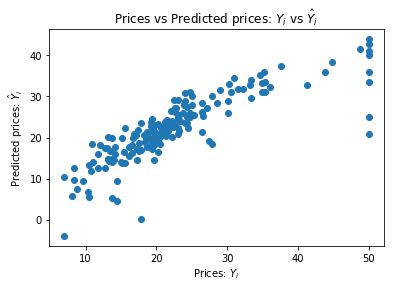

In [134]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = pred

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### chart of predicted values v/s actual values

In [135]:
acutal = list(Y_test)
predicted = list(Y_pred)

In [136]:
print("actual values v/s predicted\n")
for i in range(len(acutal)):
    print("%f \t %f"%(acutal[i] , predicted[i]))

actual values v/s predicted

37.600000 	 37.375569
27.900000 	 30.048159
22.600000 	 27.164871
13.800000 	 5.355200
35.200000 	 35.902943
10.400000 	 6.646771
23.900000 	 27.917514
29.000000 	 31.553187
22.800000 	 27.183857
23.200000 	 21.691713
33.200000 	 32.816749
19.000000 	 21.313788
20.300000 	 23.238460
36.100000 	 32.206616
24.400000 	 27.534659
17.200000 	 17.219575
17.900000 	 0.232393
19.600000 	 19.319231
19.700000 	 14.570873
15.000000 	 14.147063
8.100000 	 5.898771
23.000000 	 20.776961
44.800000 	 38.281860
23.100000 	 24.532152
32.200000 	 31.789490
10.800000 	 11.821311
23.100000 	 25.000656
21.200000 	 23.839150
22.200000 	 23.062710
24.100000 	 23.436042
17.300000 	 14.473725
7.000000 	 10.372603
12.700000 	 17.534814
17.800000 	 23.488554
26.400000 	 28.334708
19.600000 	 20.152030
25.100000 	 30.130981
8.300000 	 9.680069
48.800000 	 41.537782
34.900000 	 33.367630
13.800000 	 19.853368
14.400000 	 4.552592
30.100000 	 28.857315
12.700000 	 12.577188
27.100000 	 

### compare the weights 

In [137]:
sklear_W = list(sklearn_W)
own_W = list(W)

In [138]:
print("Sklearn   v/s     own\n")
print("="*50)
for i in range(len(own_W)):
    print("%f \t %f"%(sklearn_W[i] , own_W[i]))
print("\n\m intersept terms ")
print("="*50)
print("%f \t %f"%(sklearn_b, b))

Sklearn   v/s     own

-0.652352 	 -0.674132
0.547772 	 0.580637
-0.318632 	 -0.427761
0.748774 	 0.775076
-1.195099 	 -0.995977
2.993560 	 3.179379
-0.085829 	 -0.193168
-2.042773 	 -2.103919
0.959533 	 0.865578
-0.463772 	 -0.538941
-1.927536 	 -1.833581
0.812226 	 0.911603
-3.551600 	 -3.369270

\m intersept terms 
22.363482 	 22.595750


In [140]:
x = PrettyTable(["Implimentation", "learning_rate", "MSE"])

x.add_row(["sk_learn" , "0.01", 26.931])
x.add_row(["own","0.01", 27.051])

print(x.get_string(title="SGD Model"))

+----------------+---------------+--------+
| Implimentation | learning_rate |  MSE   |
+----------------+---------------+--------+
|    sk_learn    |      0.01     | 26.931 |
|      own       |      0.01     | 27.051 |
+----------------+---------------+--------+
